In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
dataset = pd.read_csv('Salary_Data.csv')

print(dataset.head())
print("\nSalary Data Shape = " + str(dataset.shape))

print("\nSalary Data Description")
print(dataset.describe())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Salary Data Shape = (30, 2)

Salary Data Description
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


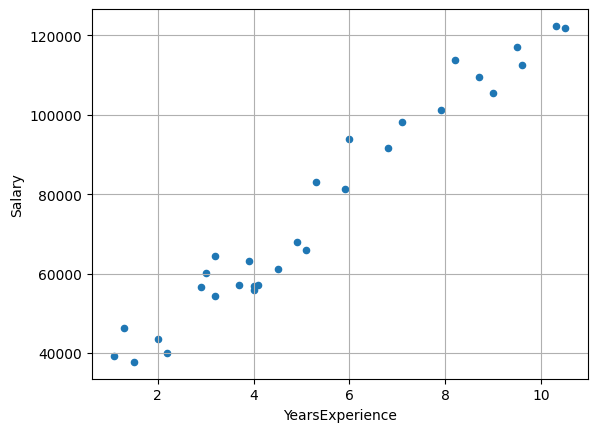

In [72]:
dataset.plot(kind="scatter", x="YearsExperience", y="Salary", grid=True)
plt.show()

In [73]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 1/3
                                                    , random_state = 0)

In [75]:
from sklearn.linear_model import LinearRegression

regressor_line = LinearRegression()

regressor_line.fit(X_train, y_train)

print('\n Coefficients:', regressor_line.coef_)
print('\n Intercept:', regressor_line.intercept_)

r_squared_train = regressor_line.score(X_train, y_train)
print('\n R-squared value for the training set:', r_squared_train)

r_squared_test = regressor_line.score(X_test, y_test)
print('\n R-squared value for the test set:', r_squared_test)



 Coefficients: [9345.94244312]

 Intercept: 26816.192244031183

 R-squared value for the training set: 0.9381900012894278

 R-squared value for the test set: 0.9749154407708353


## Visualizing the Training Set Results

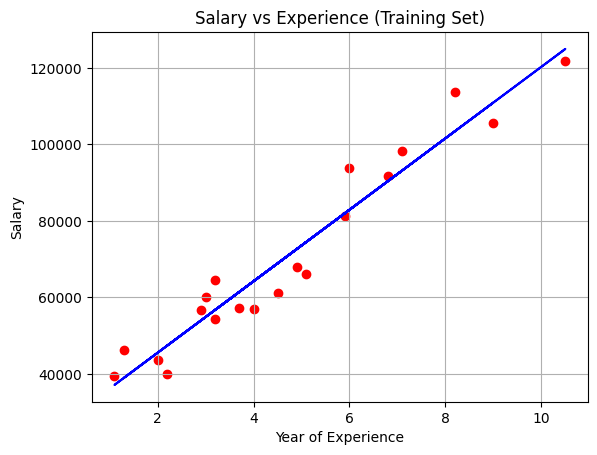

In [76]:
plt.scatter(X_train, y_train, color = 'red')

plt.plot(X_train, regressor_line.predict(X_train), color = 'blue')

plt.title('Salary vs Experience (Training Set)')

plt.xlabel('Year of Experience')

plt.ylabel('Salary')

plt.grid(True)

plt.show()

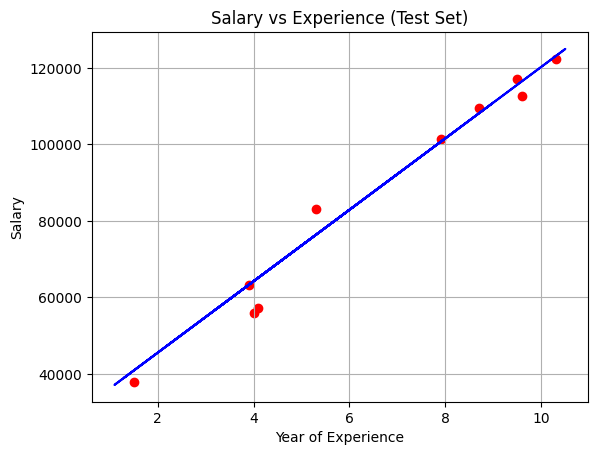

In [77]:
plt.scatter(X_test, y_test, color = 'red')

plt.plot(X_train, regressor_line.predict(X_train), color = 'blue')

plt.title('Salary vs Experience (Test Set)')

plt.xlabel('Year of Experience')

plt.ylabel('Salary')

plt.grid(True)

plt.show()

## Predicting The Test Set Results

X_test value:  [1.5] , Predicted y:  40835.105908714744
X_test value:  [10.3] , Predicted y:  123079.39940819162
X_test value:  [4.1] , Predicted y:  65134.556260832906
X_test value:  [3.9] , Predicted y:  63265.36777220843
X_test value:  [9.5] , Predicted y:  115602.64545369372


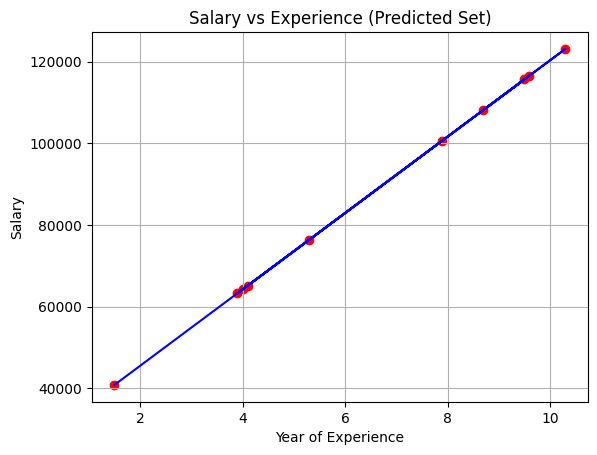

In [78]:
y_pred = regressor_line.predict(X_test)

for i in range(5):
    print("X_test value: ", X_test[i], ", Predicted y: ", y_pred[i])

plt.scatter(X_test, y_pred, color = 'red')

plt.plot(X_test, regressor_line.predict(X_test), color = 'blue')

plt.title('Salary vs Experience (Predicted Set)')

plt.xlabel('Year of Experience')

plt.ylabel('Salary')

plt.grid(True)

plt.show()

In [79]:
print("Training set score: {:.2f}".format(regressor_line.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regressor_line.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.97


# Ridge Regression

In [80]:
from sklearn.linear_model import Ridge

## Ridge at alpha = 1

In [81]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.97


In [82]:
print('\nCoefficients:', ridge.coef_)
print('Intercept:', ridge.intercept_)

print("\nR-squared value for the training set: {:.2f}".format(ridge.score(X_train, y_train)))
print("R-squared value for the test set: {:.2f}".format(ridge.score(X_test, y_test)))


Coefficients: [9273.5393006]
Intercept: 27158.659108163803

R-squared value for the training set: 0.94
R-squared value for the test set: 0.97


## Ridge at alpha = 10

In [83]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.97


## Ridge at alpha = 0.1

In [84]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.97


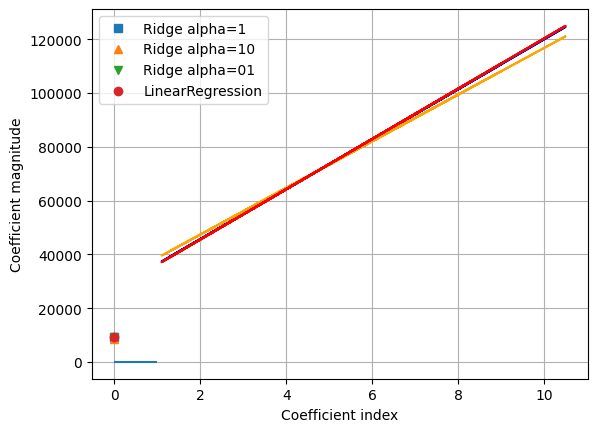

In [85]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(X_train, ridge.predict(X_train), color = 'blue')

plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(X_train, ridge10.predict(X_train), color = 'orange')

plt.plot(ridge01.coef_, 'v', label='Ridge alpha=01')
plt.plot(X_train, ridge01.predict(X_train), color = 'green')

plt.plot(regressor_line.coef_, 'o', label='LinearRegression')
plt.plot(X_train, regressor_line.predict(X_train), color = 'red')

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(regressor_line.coef_))

plt.legend()

plt.grid(True)

plt.show()

# Lasso Regression

In [86]:
from sklearn.linear_model import Lasso

In [87]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {:.0f}".format(lasso.n_features_in_))

Training set score: 0.94
Test set score: 0.97
Number of features used: 1


## Lasso at alpha = 0.001

In [88]:
lasso001 = Lasso(alpha = 0.001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.97


## Lasso at alpha = 0.0000001

In [89]:
lasso601 = Lasso(alpha = 0.0000001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso601.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso601.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.97


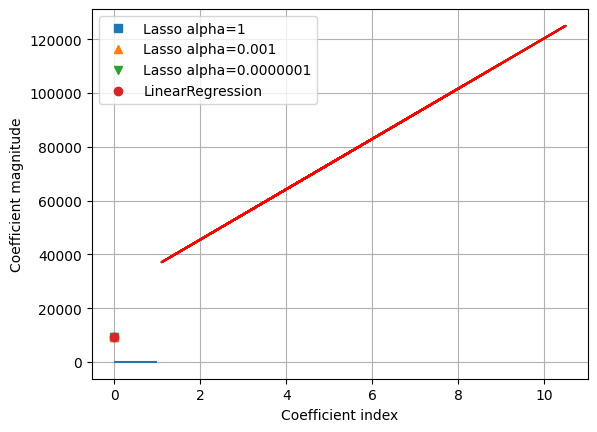

In [95]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(X_train, lasso.predict(X_train), color = 'blue')

plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.001')
plt.plot(X_train, lasso001.predict(X_train), color = 'orange')

plt.plot(lasso601.coef_, 'v', label='Lasso alpha=0.0000001')
plt.plot(X_train, lasso601.predict(X_train), color = 'green')

plt.plot(regressor_line.coef_, 'o', label='LinearRegression')
plt.plot(X_train, regressor_line.predict(X_train), color = 'red')

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(regressor_line.coef_))

plt.legend()

plt.grid(True)

plt.show()

1. How will you compare the different linear regression models?

Ridge regression and Lasso regression are regularization techniques used in linear regression. Ridge regression shrinks coefficients towards zero, while Lasso regression performs both coefficient shrinkage and variable selection. Ridge regression includes all features with smaller coefficients, whereas Lasso regression can exclude irrelevant features by setting their coefficients to zero.

2. Which one is better for the data set?

Lasso regression is better for this dataset as it can perform feature selection and eliminate irrelevant predictors.

3. Do you think using these models as a general reference helps in evaluating the behavior of the
data? Why or why not?

Using these regression models as general references can help in evaluating the behavior of the data. These models provide insights into the impact of various predictors on the response variable and aid in identifying relevant features. By examining the magnitude and significance of coefficients, one can gain an understanding of the relationships between predictors and the target variable.
